## Financial Data Analysis


#### IMPORTING IMPORTANT LIBRARIES


In [1]:
import datetime

import pandas as pd
import numpy as np


import plotly.express as px
import nltk
import textblob
import talib as ta

In [2]:
import sys
import os


sys.path.append(os.path.abspath('../scripts'))
from utils import *
from language_processing import *

data_utils = DataUtils()
LangProcess = LanguageProcessing()


### EXPLORATORY DATA ANALYSIS

#### IMPORTING DATASET

In [3]:
news = data_utils.load_news_data()

In [12]:
news.head()

,headline,url,publisher,stock
date,,,,
2020-06-05 14:30:54+00:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
2020-06-03 14:45:20+00:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2020-05-26 08:30:07+00:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
2020-05-22 16:45:06+00:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
2020-05-22 15:38:59+00:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1407328 entries, 2020-06-05 14:30:54+00:00 to 2011-05-12 04:00:00+00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   stock      1407328 non-null  object
dtypes: object(4)
memory usage: 53.7+ MB


In [6]:
news.shape

(1407328, 4)

In [7]:
news.isnull().sum()

headline     0
url          0
publisher    0
stock        0
dtype: int64

In [4]:
news[news.duplicated()]

,headline,url,publisher,stock
date,,,,
2015-07-07 04:00:00+00:00,API Tech Reports Q2 Loss $0.08 Vs Exp Loss $0....,https://www.benzinga.com/news/earnings/15/07/5...,Eddie Staley,ATNY
2015-07-01 04:00:00+00:00,"Top Performing Industries For July 1, 2015",https://www.benzinga.com/news/15/07/5642290/to...,Lisa Levin,GME


**Observation**
- The data doesn't contain null or duplicated values.

### Descriptive Statistics

In [14]:
news['headline length'] = news['headline'].apply(lambda x: len(x.split()))

In [15]:
news.describe()

,headline length
count,1.407328e+06
mean,1.141671e+01
std,6.352997e+00
min,1.000000e+00
25%,7.000000e+00
50%,1.000000e+01
75%,1.300000e+01
max,7.700000e+01


In [16]:
news_publishers = news.groupby(by=['publisher'])['headline'].count().sort_values(ascending = False)

##### Top 10 publishers

In [17]:
px.bar(news_publishers.head(10), labels={'value' : "Number of news published"})

In [18]:
px.line(news.groupby(news.index.month)['headline'].size(), title="Publicaitons per month", labels={'date': 'Months', 'value' : 'Number of news published'})

**Observation**
- In the fifth month, compared to the other months, there is a spike in news coverage, while in the ninth month, there is a noticeable dip.

In [19]:
px.line(news.groupby([news.index.year])['headline'].count(), labels={'value' : 'Number of news published', 'date' : 'Year'})

**Observation**
- After 2011, the number of news coverage was almost the same throughout the decade.

In [20]:
px.line(news.groupby([news.index.day])['headline'].count(), labels={'value' : 'Number of news published', 'date' : 'Dates'})


**Observation**
- Around the seventh or eighth day of the month, we see a slight spike, but the news coverage throughout the month is generally the same. The dip we see on the 31st day is because few months of the year have 31 days.

### Text Analysis

#### Sentiment analysis

In [4]:
news['cleaned_headline'] = news['headline'].apply(lambda word: LangProcess.clean_data(word))

In [ ]:
news['cleaned_headline'].isnull().sum()

In [ ]:
news.dropna(inplace=True)

In [6]:
news['sentiment'] = news['cleaned_headline'].apply(lambda word: LangProcess.sentiment_analysis(word))

In [17]:
news['sentiment'].head(10)

date
2020-06-05 14:30:54+00:00    0.000
2020-06-03 14:45:20+00:00    0.000
2020-05-26 08:30:07+00:00    0.000
2020-05-22 16:45:06+00:00    0.000
2020-05-22 15:38:59+00:00    0.340
2020-05-22 15:23:25+00:00   -0.296
2020-05-22 13:36:20+00:00    0.000
2020-05-22 13:07:04+00:00    0.296
2020-05-22 12:37:59+00:00   -0.128
2020-05-22 12:06:17+00:00    0.000
Name: sentiment, dtype: float64

In [11]:
news.to_csv('News Sentiment.csv')

#### Topic modelling

In [6]:
# The top 10 Topics/words that appear
word_count = LangProcess.TopicModel_TFIDF(news)
word_count.head(10)

stocks       60710.800891
market       50704.430556
reports      46649.321116
vs           46586.273132
shares       45817.598239
earnings     44637.051339
benzinga     42176.824784
update       41801.632940
est          41141.876663
announces    38309.220465
dtype: float64

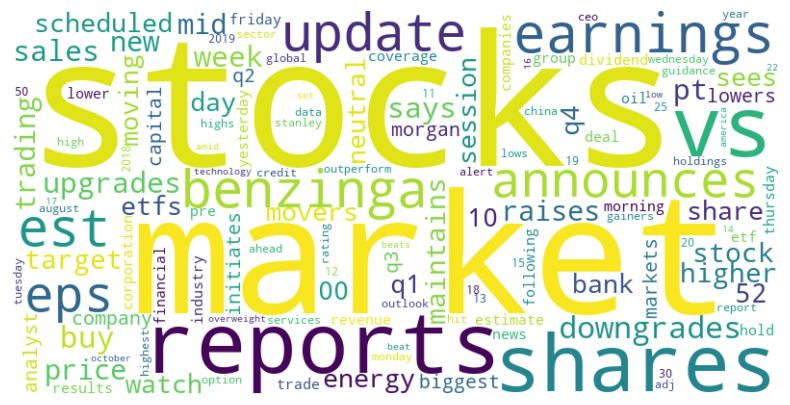

In [7]:
# Word Cloud for news headline
LangProcess.plot_wordCloud(word_count)